In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
#Importing Dataset
dataset = pd.read_csv('Position_Salaries.csv')
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [16]:
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, -1].values

In [4]:
#Since dataset is small, we do not need to split it into training and test set

In [20]:
#Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
#Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
#NOTE - We can vary degree from 2 onwards to get better predictions
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)

In [22]:
X_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

Note that ```X_poly``` matrix has three columns. Second and third columns are square and cubes of ```X```.
First column is just an array of ones similar to column of one's we appended in Multiple Linear Regression before Backward Elimination method.

In [23]:
#Create another Linear Regression odel but using the polynomail feature X_poly for fitting
linear_reg2 = LinearRegression()
linear_reg2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Text(0, 0.5, 'Salaries')

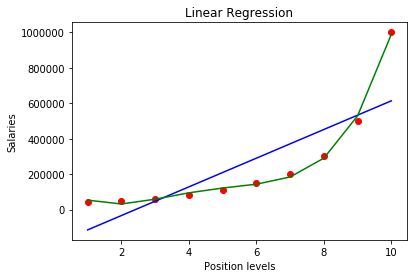

In [9]:
#Visualizing the Linear Regression Results

#Actual values
plt.scatter(X, y, c='r')

#Predicted salaries by Linear Regression Model
plt.plot(X, linear_reg.predict(X), c='b')

#Predicted salaries by Polynomial Regression Model
plt.plot(X, linear_reg2.predict(poly_reg.fit_transform(X)), c='g')

plt.title('Linear Regression')
plt.xlabel('Position levels')
plt.ylabel('Salaries')

In [24]:
#Make above prediction even more smooth by adding points in between 1 and 10 on x-axis
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(len(X_grid),1)

X_grid[:5]

array([[1. ],
       [1.1],
       [1.2],
       [1.3],
       [1.4]])

Text(0, 0.5, 'Salaries')

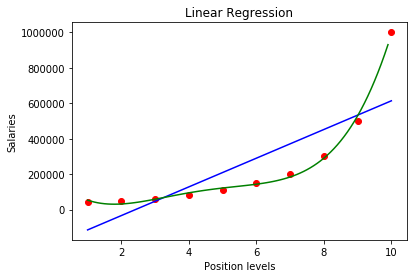

In [11]:
#Plotting again with more point on x-axis from above X_grid

#Actual values
plt.scatter(X, y, c='r')

#Predicted salaries by Linear Regression Model
plt.plot(X, linear_reg.predict(X), c='b')

#Predicted salaries by Polynomial Regression Model
plt.plot(X_grid, linear_reg2.predict(poly_reg.fit_transform(X_grid)), c='g')

plt.title('Linear Regression')
plt.xlabel('Position levels')
plt.ylabel('Salaries')

#### As shown above, the graph is much smooth now sicne there are more observations on x-axis.

In [25]:
#Get prediction for X=6.5 using Linear Regression Model.
linear_reg.predict(np.array(6.5).reshape(1,-1))

array([330378.78787879])

In [26]:
#Get prediction for X=6.5 using Polynomial Regression Model
linear_reg2.predict(poly_reg.fit_transform(np.array(6.5).reshape(1,-1)))

array([158862.45265155])

#### Comparing both vaues, we can confirm that the salary predicted by Polynomial model is more accurate as compared to Linear Regression Model.